In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
base_path = '/content/drive/MyDrive/dataset final'
train_path = '/content/drive/MyDrive/dataset final/test'
test_path = '/content/drive/MyDrive/dataset final/train'

os.makedirs(train_path + 'vehicles', exist_ok=True)
os.makedirs(train_path + 'non-vehicles', exist_ok=True)
os.makedirs(test_path + 'vehicles', exist_ok=True)
os.makedirs(test_path + 'non-vehicles', exist_ok=True)

In [ ]:
import os

# Define the paths to your source vehicle and non-vehicle directories
src_vehicles_path = '/content/drive/MyDrive/dataset final/vehicles/'
src_non_vehicles_path = '/content/drive/MyDrive/dataset final/non-vehicles/'

# Check if the directories exist, and create them if they don't
if not os.path.exists(src_vehicles_path):
    os.makedirs(src_vehicles_path)
    print(f"Directory '{src_vehicles_path}' created.")
if not os.path.exists(src_non_vehicles_path):
    os.makedirs(src_non_vehicles_path)
    print(f"Directory '{src_non_vehicles_path}' created.")

# List all vehicle and non-vehicle images
vehicle_images = os.listdir(src_vehicles_path)
non_vehicle_images = os.listdir(src_non_vehicles_path)

# Now you can proceed with further processing or manipulation of these images


Directory '/content/drive/MyDrive/dataset final/vehicles/' created.
Directory '/content/drive/MyDrive/dataset final/non-vehicles/' created.


In [ ]:
import os
import shutil

# Define the source and destination paths
src_vehicles_path = '/content/drive/MyDrive/dataset final/vehicles/'
src_non_vehicles_path = '/content/drive/MyDrive/dataset final/non-vehicles/'

dest_train_vehicles_path = '/content/drive/MyDrive/dataset final/train/vehicles/'
dest_train_non_vehicles_path = '/content/drive/MyDrive/dataset final/train/non-vehicles/'
dest_test_vehicles_path = '/content/drive/MyDrive/dataset final/test/vehicles/'
dest_test_non_vehicles_path = '/content/drive/MyDrive/dataset final/test/non-vehicles/'

#split the data into 80% for training and 20% for testing
split_ratio = 0.8

# List all vehicle and non-vehicle images
vehicle_images = os.listdir(src_vehicles_path)
non_vehicle_images = os.listdir(src_non_vehicles_path)

# Calculate the number of images for training and testing
num_train_vehicles = int(len(vehicle_images) * split_ratio)
num_train_non_vehicles = int(len(non_vehicle_images) * split_ratio)

# Copy images to the training folders
for img in vehicle_images[:num_train_vehicles]:
    shutil.copy(src_vehicles_path + img, dest_train_vehicles_path + img)

for img in non_vehicle_images[:num_train_non_vehicles]:
    shutil.copy(src_non_vehicles_path + img, dest_train_non_vehicles_path + img)

# Copy the remaining images to the testing folders
for img in vehicle_images[num_train_vehicles:]:
    shutil.copy(src_vehicles_path + img, dest_test_vehicles_path + img)

for img in non_vehicle_images[num_train_non_vehicles:]:
    shutil.copy(src_non_vehicles_path + img, dest_test_non_vehicles_path + img)


In [ ]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the batch size
Batch_size1 = 32

# Create an ImageDataGenerator for test data
test_datagen = ImageDataGenerator()

# Create an ImageDataGenerator for train data
train_datagen = ImageDataGenerator()

# Define paths
test_path = '/content/drive/MyDrive/dataset final/test'
train_path = '/content/drive/MyDrive/dataset final/train'

# Load test data
test_Image = test_datagen.flow_from_directory(
    test_path,
    target_size=(64, 64),
    batch_size=Batch_size1,
    class_mode='binary',
    shuffle=False  # Important: Set shuffle to False for evaluation
)

# Load train data
train_Image = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=Batch_size1,
    class_mode='binary'
)


Found 2122 images belonging to 2 classes.
Found 2122 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall

# Define your model architecture
cnn_model = Sequential()

# Add convolutional layers with max pooling
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='Same', activation='relu', input_shape=(64, 64, 3)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='Same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='Same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='Same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
cnn_model.add(Flatten())

# Add dense layers with dropout for regularization to prevent overfitting
cnn_model.add(Dense(512, activation="relu"))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(256, activation="relu"))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(64, activation="relu"))
cnn_model.add(Dropout(0.2))

# Output layer with sigmoid activation for binary classification
cnn_model.add(Dense(1, activation="sigmoid"))

# Define early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=1, verbose=1)

# Compile the model with binary crossentropy loss and Adam optimizer
optimizer = Adam(learning_rate=0.0001)
cnn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])


In [ ]:
from keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the CNN model
history = cnn_model.fit(train_Image, epochs=10, validation_data=test_Image, batch_size=Batch_size1, callbacks=[early_stopping])


Epoch 1/10
67/67 [==============================] - 1768s 27s/step - loss: 0.3837 - accuracy: 0.8539 - precision: 0.8654 - recall: 0.9170 - val_loss: 0.0807 - val_accuracy: 0.9821 - val_precision: 0.9862 - val_recall: 0.9862
Epoch 2/10
67/67 [==============================] - 65s 968ms/step - loss: 0.1117 - accuracy: 0.9628 - precision: 0.9662 - recall: 0.9767 - val_loss: 0.1475 - val_accuracy: 0.9576 - val_precision: 0.9992 - val_recall: 0.9352
Epoch 3/10
67/67 [==============================] - 65s 969ms/step - loss: 0.0635 - accuracy: 0.9802 - precision: 0.9847 - recall: 0.9847 - val_loss: 0.0972 - val_accuracy: 0.9642 - val_precision: 0.9476 - val_recall: 1.0000
Epoch 4/10
67/67 [==============================] - 72s 1s/step - loss: 0.0340 - accuracy: 0.9906 - precision: 0.9927 - recall: 0.9927 - val_loss: 0.0182 - val_accuracy: 0.9948 - val_precision: 0.9921 - val_recall: 1.0000
Epoch 5/10
67/67 [==============================] - 72s 1s/step - loss: 0.0159 - accuracy: 0.9958 - pre

In [ ]:
import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming you already have the train and test data prepared

# Load train data
train_features = []
train_labels = []
for class_name in os.listdir(train_path):
    class_path = os.path.join(train_path, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = image.load_img(img_path, target_size=(64, 64))
        img_array = image.img_to_array(img)
        train_features.append(img_array)
        train_labels.append(class_name)

train_features = np.array(train_features)
train_labels = np.array(train_labels)

# Load test data
test_features = []
test_labels = []
for class_name in os.listdir(test_path):
    class_path = os.path.join(test_path, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = image.load_img(img_path, target_size=(64, 64))
        img_array = image.img_to_array(img)
        test_features.append(img_array)
        test_labels.append(class_name)

test_features = np.array(test_features)
test_labels = np.array(test_labels)

# Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(train_features.reshape(train_features.shape[0], -1), train_labels_encoded)

# Predictions
knn_predictions = knn_classifier.predict(test_features.reshape(test_features.shape[0], -1))

# Evaluation
knn_accuracy = accuracy_score(test_labels_encoded, knn_predictions)
print("k-NN Accuracy:", knn_accuracy)


k-NN Accuracy: 0.9057492931196984


In [ ]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(train_features.reshape(train_features.shape[0], -1), train_labels_encoded)

# Predictions
svm_predictions = svm_classifier.predict(test_features.reshape(test_features.shape[0], -1))

# Evaluation
svm_accuracy = accuracy_score(test_labels_encoded, svm_predictions)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 1.0


In [ ]:
logistic_classifier = LogisticRegression(max_iter=1000)
logistic_classifier.fit(train_features.reshape(train_features.shape[0], -1), train_labels_encoded)

# Predictions
logistic_predictions = logistic_classifier.predict(test_features.reshape(test_features.shape[0], -1))

# Evaluation
logistic_accuracy = accuracy_score(test_labels_encoded, logistic_predictions)
print("Logistic Regression Accuracy:", logistic_accuracy)


Logistic Regression Accuracy: 1.0


In [ ]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(train_features.reshape(train_features.shape[0], -1), train_labels_encoded)

# Predictions
decision_tree_predictions = decision_tree_classifier.predict(test_features.reshape(test_features.shape[0], -1))

# Evaluation
decision_tree_accuracy = accuracy_score(test_labels_encoded, decision_tree_predictions)
print("Decision Tree Accuracy:", decision_tree_accuracy)


Decision Tree Accuracy: 1.0


In [ ]:
random_forest_classifier = RandomForestClassifier(n_estimators=100)
random_forest_classifier.fit(train_features.reshape(train_features.shape[0], -1), train_labels_encoded)

# Predictions
random_forest_predictions = random_forest_classifier.predict(test_features.reshape(test_features.shape[0], -1))

# Evaluation
random_forest_accuracy = accuracy_score(test_labels_encoded, random_forest_predictions)
print("Random Forest Accuracy:", random_forest_accuracy)


Random Forest Accuracy: 1.0


In [ ]:
adaboost_classifier = AdaBoostClassifier(n_estimators=100)
adaboost_classifier.fit(train_features.reshape(train_features.shape[0], -1), train_labels_encoded)

# Predictions
adaboost_predictions = adaboost_classifier.predict(test_features.reshape(test_features.shape[0], -1))

# Evaluation
adaboost_accuracy = accuracy_score(test_labels_encoded, adaboost_predictions)
print("AdaBoost Accuracy:", adaboost_accuracy)


AdaBoost Accuracy: 1.0


k-NN Accuracy: 0.9057492931196984
SVM Accuracy: 1.0
Logistic Regression Accuracy: 1.0
Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
AdaBoost Accuracy: 1.0
CNN Accuracy: 0.9990574717521667


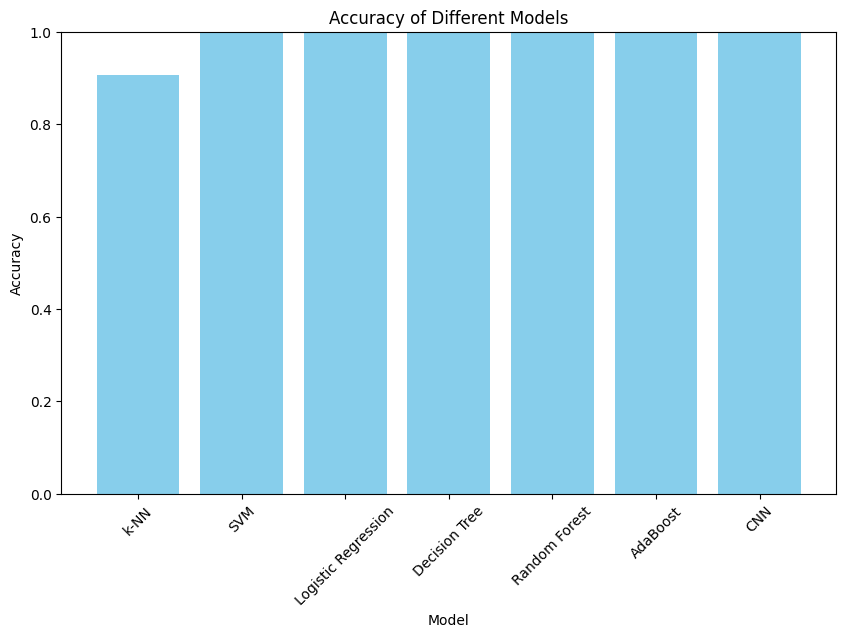

In [ ]:
batch_size_predictions = 32
model_names = []
accuracies = []
from sklearn.metrics import accuracy_score

# Assuming you have a dictionary called 'models_dict' containing your models
models_dict = {
    "k-NN": knn_classifier,
    "SVM": svm_classifier,
    "Logistic Regression": logistic_classifier,
    "Decision Tree": decision_tree_classifier,
    "Random Forest": random_forest_classifier,
    "AdaBoost": adaboost_classifier
}

for model_name, model in models_dict.items():
    # Assuming test_features and test_labels_encoded are already defined
    predictions = model.predict(test_features.reshape(test_features.shape[0], -1))
    accuracy = accuracy_score(test_labels_encoded, predictions)
    model_names.append(model_name)
    accuracies.append(accuracy)
    print(f"{model_name} Accuracy: {accuracy}")
cnn_accuracy = history.history['accuracy'][-1]
print(f"CNN Accuracy: {cnn_accuracy}")
import matplotlib.pyplot as plt

# Append CNN accuracy to the accuracies list
model_names.append("CNN")
accuracies.append(cnn_accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


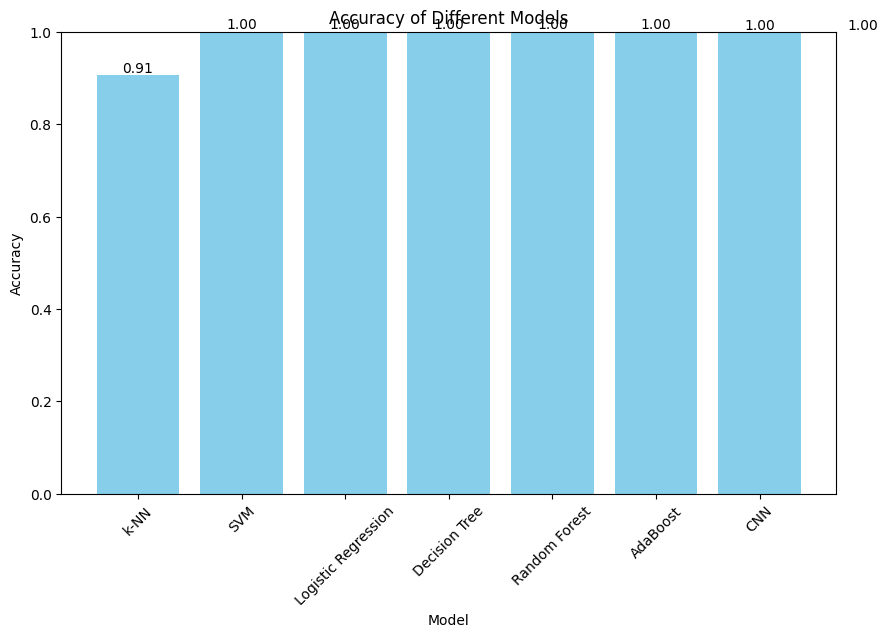

In [ ]:
import matplotlib.pyplot as plt

# Append CNN accuracy to the accuracies list
model_names.append("CNN")
accuracies.append(cnn_accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add the accuracy values on top of the bars
for i in range(len(model_names)):
    plt.text(i, accuracies[i], f"{accuracies[i]:.2f}", ha='center', va='bottom')

plt.show()


In [ ]:
# Initialize a dictionary to store predictions for each model
predictions_dict = {}

# Loop through the classification models in the models_dict
for model_name, model in models_dict.items():
    if model_name in ["k-NN", "SVM", "Logistic Regression", "Decision Tree", "Random Forest", "AdaBoost"]:
        # Assuming test_features and test_labels_encoded are already defined
        predictions = model.predict(test_features.reshape(test_features.shape[0], -1))
        predictions_dict[model_name] = predictions


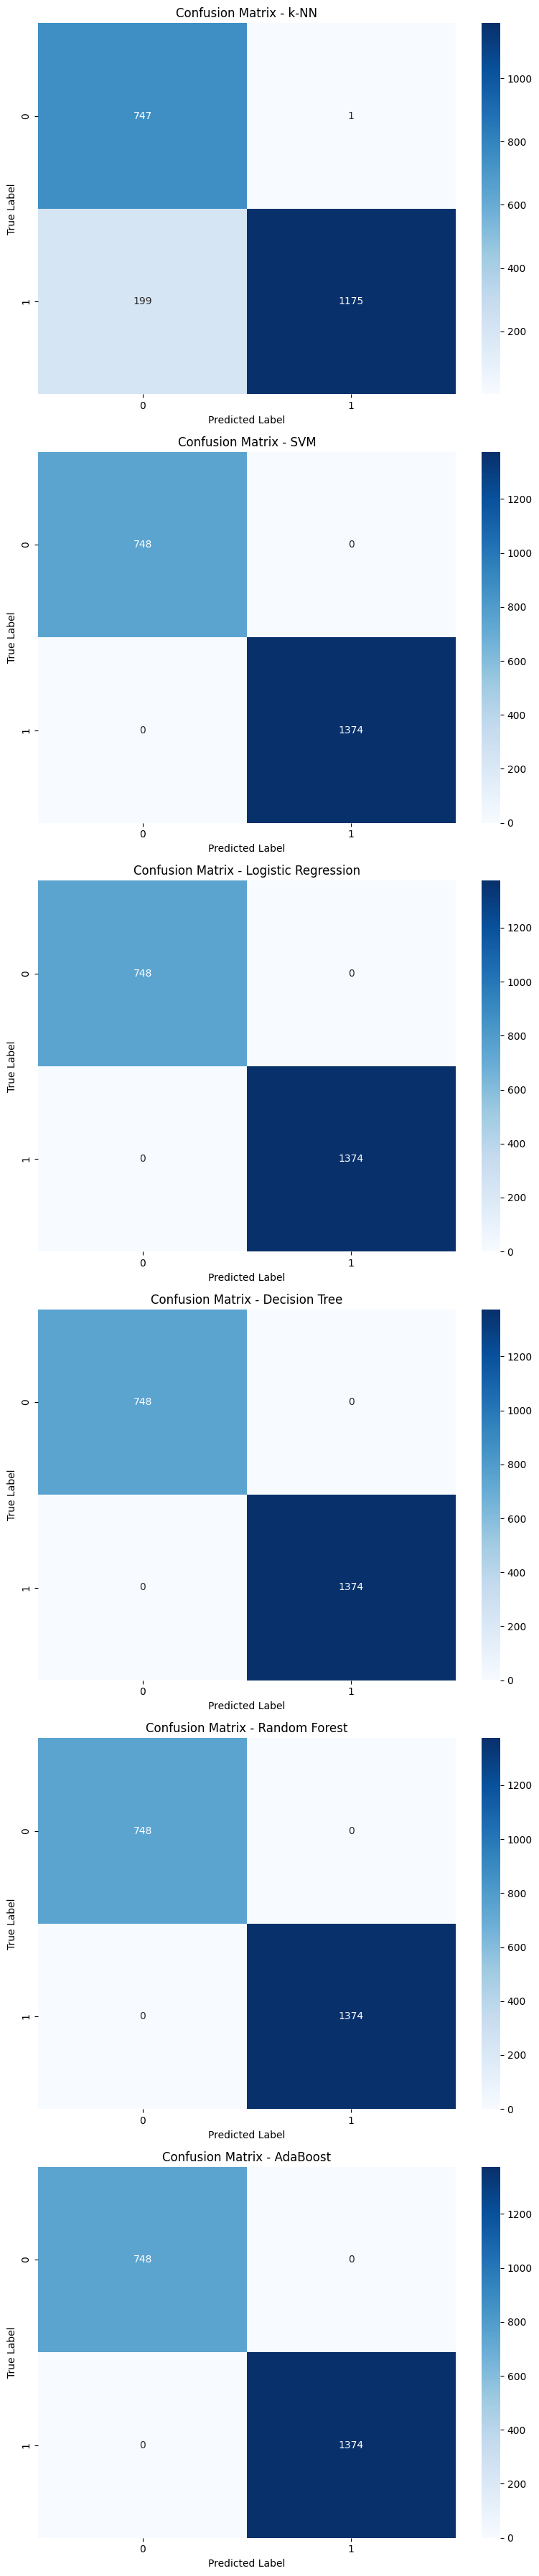

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Initialize a dictionary to store confusion matrices for each model
confusion_matrices_dict = {}

# Loop through the classification models in the models_dict
for model_name, predictions in predictions_dict.items():
    if model_name in ["k-NN", "SVM", "Logistic Regression", "Decision Tree", "Random Forest", "AdaBoost"]:
        # Assuming test_labels_encoded is already defined
        confusion_matrices_dict[model_name] = confusion_matrix(test_labels_encoded, predictions)

# Set the number of rows and columns for subplots
num_rows = len(confusion_matrices_dict)
num_cols = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 6*num_rows))

# Loop through the confusion_matrices_dict and plot each confusion matrix
for i, (model_name, confusion_matrix_data) in enumerate(confusion_matrices_dict.items()):
    ax = axes[i] if num_rows > 1 else axes
    sns.heatmap(confusion_matrix_data, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score

# Initialize dictionaries to store accuracy and precision for each model
accuracy_scores = {}
precision_scores = {}

# Loop through the predictions_dict and calculate accuracy and precision for each model
for model_name, predictions in predictions_dict.items():
    if model_name in ["k-NN", "SVM", "Logistic Regression", "Decision Tree", "Random Forest", "AdaBoost"]:
        accuracy = accuracy_score(test_labels_encoded, predictions)
        precision = precision_score(test_labels_encoded, predictions)
        accuracy_scores[model_name] = accuracy
        precision_scores[model_name] = precision


In [ ]:
# Display accuracy scores
print("Accuracy Scores:")
for model_name, accuracy in accuracy_scores.items():
    print(f"{model_name}: {accuracy:.2f}")

# Display precision scores
print("\nPrecision Scores:")
for model_name, precision in precision_scores.items():
    print(f"{model_name}: {precision:.2f}")


Accuracy Scores:
k-NN: 0.91
SVM: 1.00
Logistic Regression: 1.00
Decision Tree: 1.00
Random Forest: 1.00
AdaBoost: 1.00

Precision Scores:
k-NN: 1.00
SVM: 1.00
Logistic Regression: 1.00
Decision Tree: 1.00
Random Forest: 1.00
AdaBoost: 1.00


In [ ]:
from sklearn.metrics import f1_score

# Initialize a dictionary to store F1 scores for each model
f1_scores = {}

# Loop through the predictions_dict and calculate F1 score for each model
for model_name, predictions in predictions_dict.items():
    if model_name in ["k-NN", "SVM", "Logistic Regression", "Decision Tree", "Random Forest", "AdaBoost"]:
        f1 = f1_score(test_labels_encoded, predictions)
        f1_scores[model_name] = f1


F1 Scores:
k-NN: 0.92
SVM: 1.00
Logistic Regression: 1.00
Decision Tree: 1.00
Random Forest: 1.00
AdaBoost: 1.00


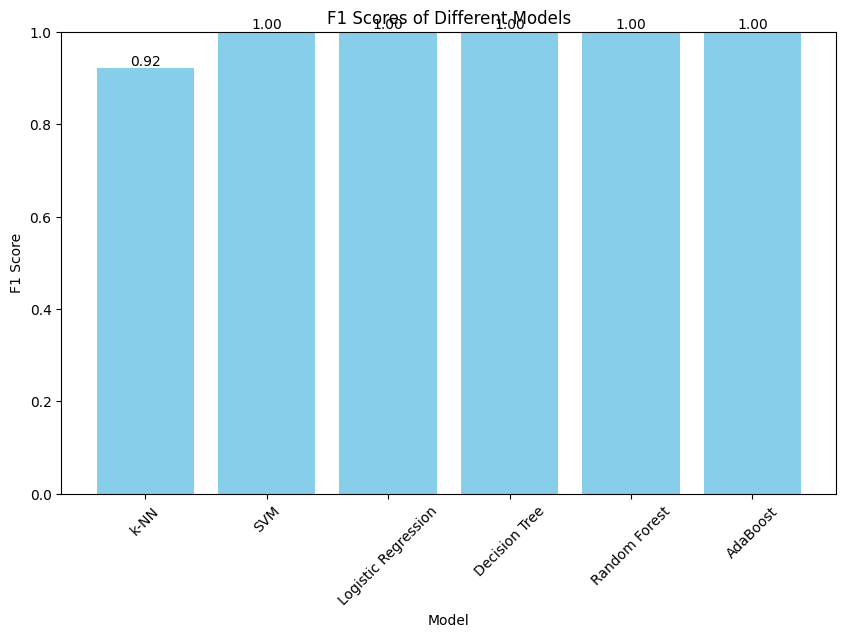

In [ ]:
# Display F1 scores
print("F1 Scores:")
for model_name, f1 in f1_scores.items():
    print(f"{model_name}: {f1:.2f}")
import matplotlib.pyplot as plt

# Extract model names and F1 scores
model_names = list(f1_scores.keys())
f1_scores_values = list(f1_scores.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_names, f1_scores_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Scores of Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add the F1 scores values on top of the bars
for i in range(len(model_names)):
    plt.text(i, f1_scores_values[i], f"{f1_scores_values[i]:.2f}", ha='center', va='bottom')

plt.show()


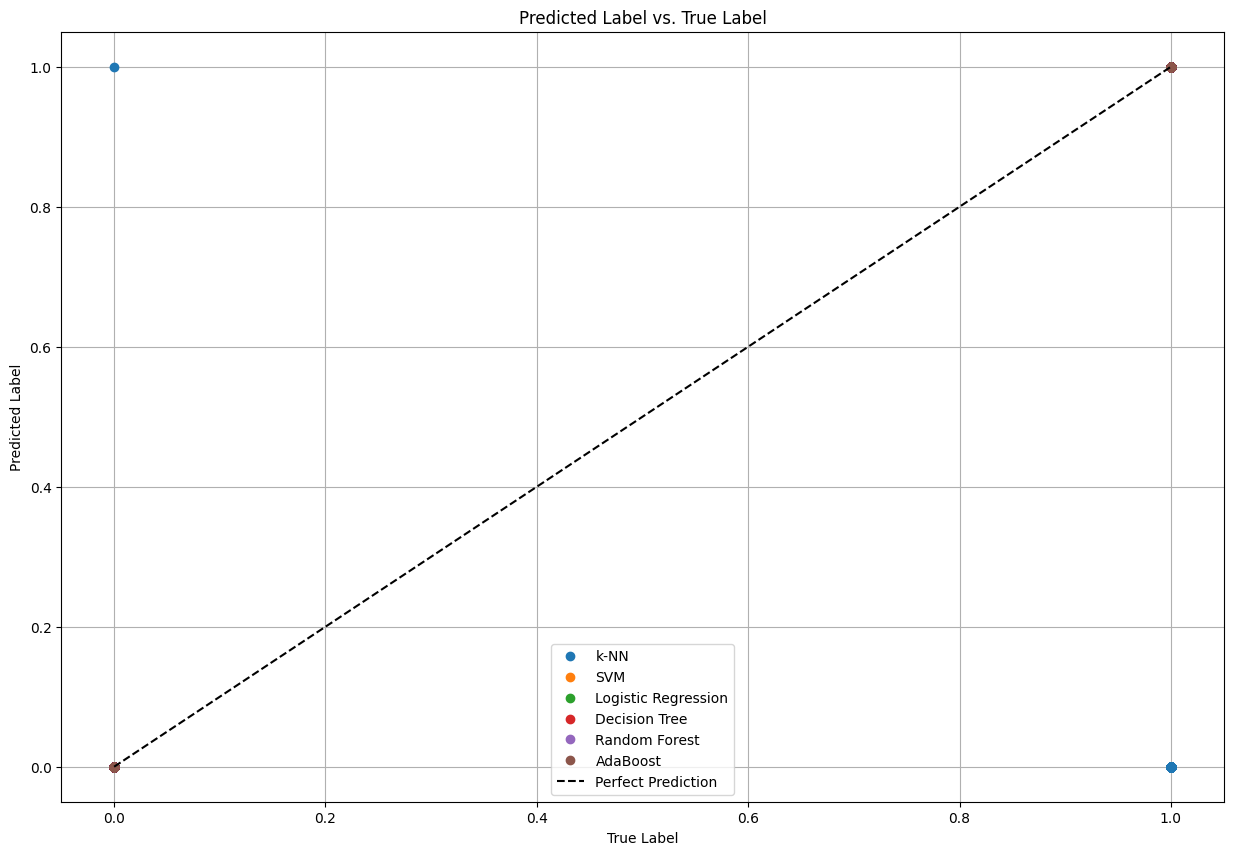

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(15, 10))

# Plotting predictions for each model
for model_name, predictions in predictions_dict.items():
    plt.plot(test_labels_encoded, predictions, 'o', label=model_name)

# Plotting the diagonal (perfect prediction line)
plt.plot([min(test_labels_encoded), max(test_labels_encoded)], [min(test_labels_encoded), max(test_labels_encoded)], 'k--', label='Perfect Prediction')

plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Predicted Label vs. True Label')
plt.legend()
plt.grid(True)
plt.show()


67/67 [==============================] - 20s 281ms/step


<ipython-input-34-f6072de226bd>:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(predicted_prob > 0.5)


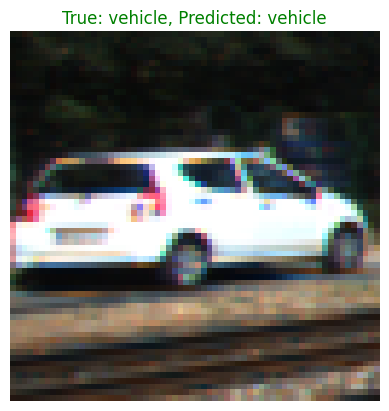

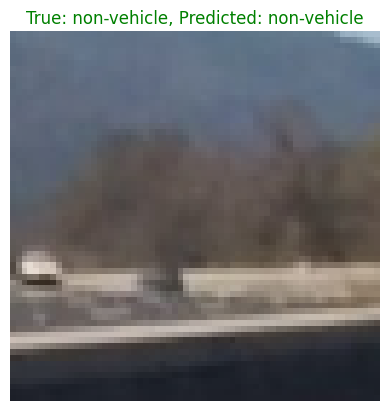

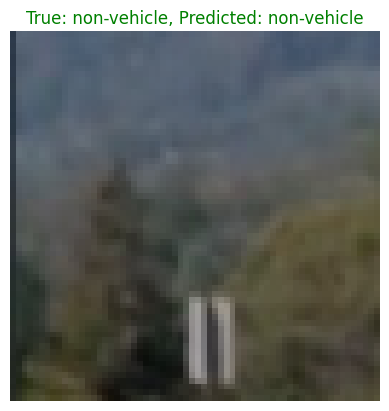

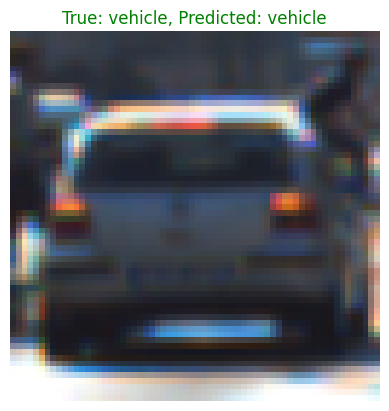

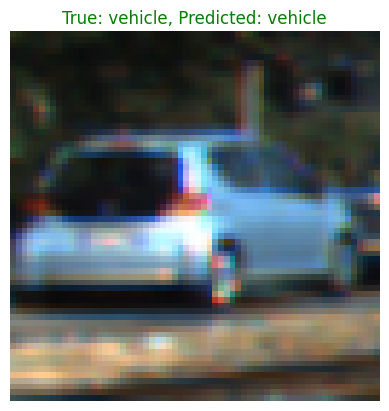

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Class labels
class_labels = {0: 'non-vehicle', 1: 'vehicle'}

# Function to display images with predictions
def visualize_predictions(model, test_path, test_data_gen, num_samples=5):
    # Generate predictions for the test set
    predictions = model.predict(test_data_gen)

    # Get the true labels from the test set
    true_labels = test_data_gen.classes

    # Get the filenames and class indices
    filenames = test_data_gen.filenames
    class_indices = test_data_gen.class_indices

    # Select a random sample of test images
    sample_indices = np.random.choice(len(filenames), num_samples, replace=False)

    # Display the images with predictions
    for i in sample_indices:
        filename = filenames[i]

        # Get the true label
        true_label = class_labels[true_labels[i]]

        # Get the predicted probability and class
        predicted_prob = predictions[i]
        predicted_class = int(predicted_prob > 0.5)
        predicted_label = class_labels[predicted_class]

        # Determine the color for the label (green for correct, red for incorrect)
        label_color = 'green' if true_label == predicted_label else 'red'

        # Load and display the image
        img_path = os.path.join(test_path, filename)
        img = image.load_img(img_path, target_size=(64, 64))

        plt.imshow(img)
        plt.title(f'True: {true_label}, Predicted: {predicted_label}', color=label_color)
        plt.axis('off')
        plt.show()

# Assuming you have already defined your cnn_model and test_Image
visualize_predictions(cnn_model, test_path, test_Image, num_samples=5)
